In [3]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Regular Expressions for String manipulation
import re

# Ignore warnings as I have Python 3
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the csv

loan_df = pd.read_csv("C:/Users/gs6972/loan.csv",dtype=object)


print(loan_df.shape)

(39717, 111)


In [5]:
#Data cleanup by removing null or #n/a values
loan_df.drop(loan_df.iloc[:,54:105],inplace=True,axis=1)
loan_df.drop(loan_df.iloc[:,106:110],inplace=True,axis=1)
unserial_columns=["desc","url","emp_title"]
loan_df.drop(labels=unserial_columns,axis=1,inplace=True)

In [6]:
print(loan_df.shape)

(39717, 57)


In [8]:
#replacing na in employee length with 0 & extracting only digits from it
#str.extract() is the method used.
#(\d+) is the regular expression pattern.
#The \d matches any digit (0-9).
#The + quantifier matches one or more occurrences of the preceding pattern (digits).
#The parentheses () are used to capture the matched digits as a group.
loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,1,INDIVIDUAL,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,1,INDIVIDUAL,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,1,INDIVIDUAL,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,1,INDIVIDUAL,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,1,INDIVIDUAL,NaN,0,0,NaN,NaN,NaN,NaN


In [9]:
# deleting current customers
loan_df = loan_df[loan_df.loan_status != "Current"]

In [10]:
print(loan_df.shape)

(38577, 57)


In [11]:
#percentages of various purpose of loans 
(loan_df.purpose.value_counts()*100)/len(loan_df)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

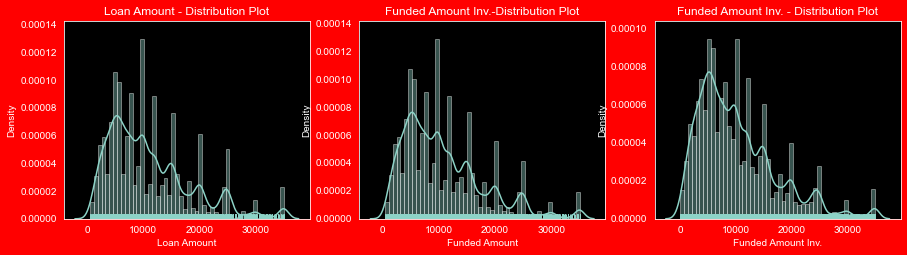

In [15]:
plt.figure(figsize=(15,8),facecolor='r')
sns.set_style("dark")
with plt.style.context('dark_background'):

  #subplot1
  plt.subplot(2,3,1)
  ax=sns.distplot(loan_df['loan_amnt'],rug=True)
  ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')

    #subplot2
  plt.subplot(2,3,2)
  ax=sns.distplot(loan_df['funded_amnt'],rug=True)
  ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount')


  #subplot3

  plt.subplot(2, 3, 3)
  ax = sns.distplot(loan_df['funded_amnt_inv'],rug = True)
  ax.set(title='Funded Amount Inv. - Distribution Plot',xlabel='Funded Amount Inv.')

  plt.show()

In [16]:
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]

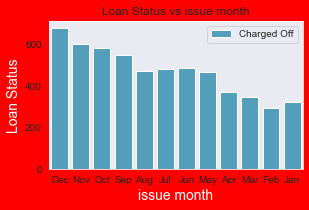

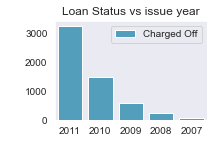

In [19]:
plt.figure(figsize=(10,6),facecolor='r')

plt.subplot(221)
ax = sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue month')
ax.set_xlabel('issue month',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

plt.subplot(222)
ax = sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue year')
ax.set_xlabel('issue year',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

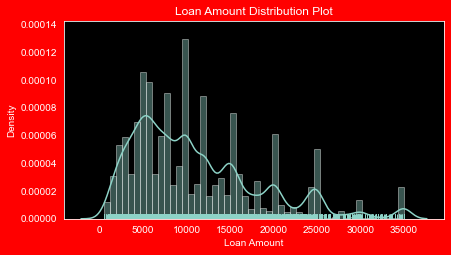

In [20]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(15,8),facecolor='r')
  


  plt.subplot(2,2,1)
  ax=sns.distplot(loan_df['loan_amnt'],rug=True)
  ax.set(title='Loan Amount Distribution Plot')
  ax.set_xlabel('Loan Amount', fontsize=10,color='w')

 

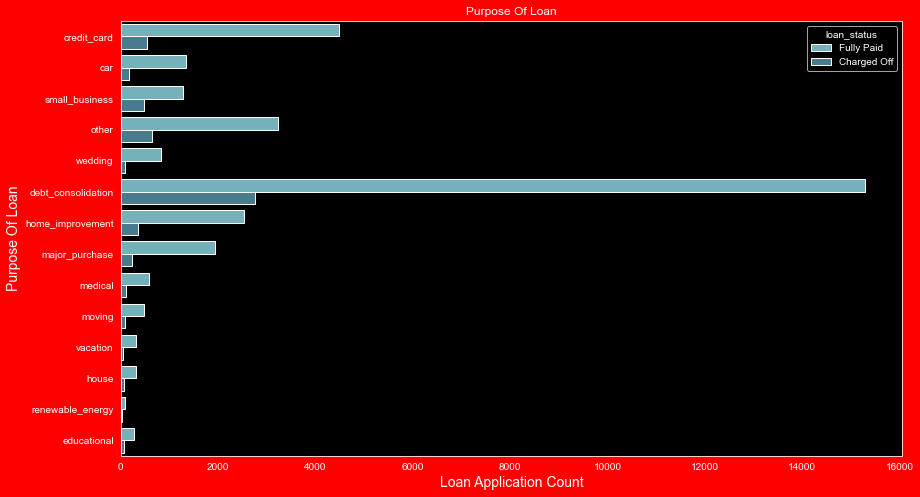

In [52]:
plt.figure(figsize=(14,8),facecolor='r')
sns.set_style("dark")
with plt.style.context('dark_background'):
  ax=sns.countplot(y="purpose",data=loan_df,hue='loan_status',palette='GnBu_d')
  ax.set(title='Purpose Of Loan')
  ax.set_ylabel('Purpose Of Loan',fontsize=14,color='w')
  ax.set_xlabel('Loan Application Count',fontsize=14,color='w')
  plt.show()

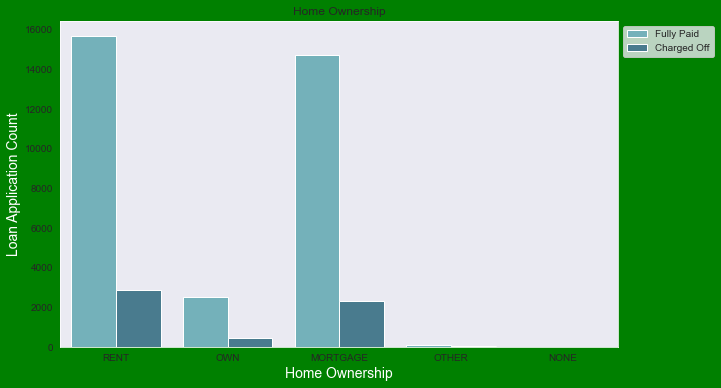

In [22]:
plt.figure(figsize=(10,6),facecolor='g')
ax=sns.countplot(x="home_ownership",data=loan_df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')
plt.show()

In [23]:
emplen_against_loan = loan_df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_against_loan['Total'] = emplen_against_loan['Charged Off'] + emplen_against_loan['Fully Paid']
emplen_against_loan['ChargedOff_Proportion'] = emplen_against_loan['Charged Off']/emplen_against_loan['Total']
emplen_against_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,0,228,805,1033,0.220716
2,10,1331,7157,8488,0.156810
8,7,263,1448,1711,0.153711
6,5,458,2736,3194,0.143394
1,1,1095,6582,7677,0.142634
7,6,307,1861,2168,0.141605
9,8,203,1232,1435,0.141463
4,3,555,3457,4012,0.138335
5,4,462,2880,3342,0.138241
3,2,567,3724,4291,0.132137


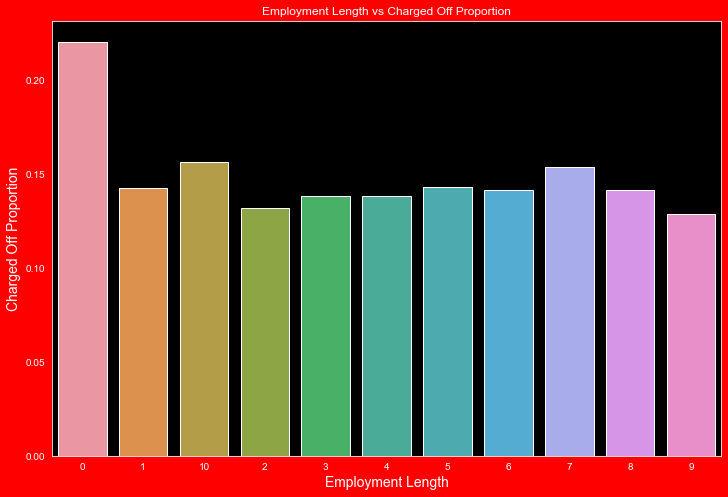

In [32]:
with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='r')
  ax1.set(title='Employment Length vs Charged Off Proportion')
  ax1=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_against_loan)
  ax1.set_xlabel('Employment Length',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()


In [26]:
state_against_loan = loan_df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_against_loan['Total'] = state_against_loan['Charged Off'] + state_against_loan['Fully Paid']
state_against_loan['ChargedOff_Proportion'] = state_against_loan['Charged Off']/state_against_loan['Total']
state_against_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,ChargedOff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,108.0,371.0,479.0,0.225470
40,SD,12.0,50.0,62.0,0.193548
0,AK,15.0,63.0,78.0,0.192308
9,FL,504.0,2277.0,2781.0,0.181230
24,MO,114.0,556.0,670.0,0.170149
11,HI,28.0,138.0,166.0,0.168675
13,ID,1.0,5.0,6.0,0.166667
31,NM,30.0,153.0,183.0,0.163934
36,OR,71.0,364.0,435.0,0.163218


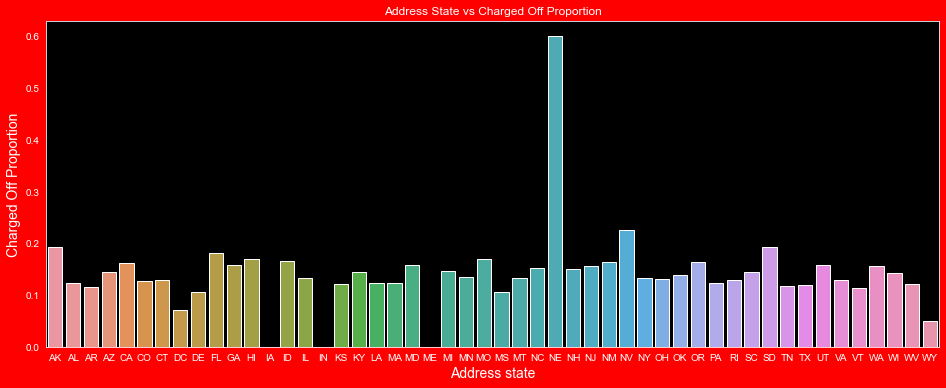

In [33]:
with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(16,6),facecolor='r')
  ax1.set(title='Address State vs Charged Off Proportion')
  ax1=sns.barplot(x='addr_state',y='ChargedOff_Proportion',data=state_against_loan)
  ax1.set_xlabel('Address state',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

In [28]:
verify_against_loan = loan_df.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_against_loan['Total'] = verify_against_loan['Charged Off'] + verify_against_loan['Fully Paid']
verify_against_loan['ChargedOff_Proportion'] = verify_against_loan['Charged Off']+verify_against_loan['Total']
verify_against_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,Not Verified,2142,14552,16694,18836
2,Verified,2051,10155,12206,14257
1,Source Verified,1434,8243,9677,11111


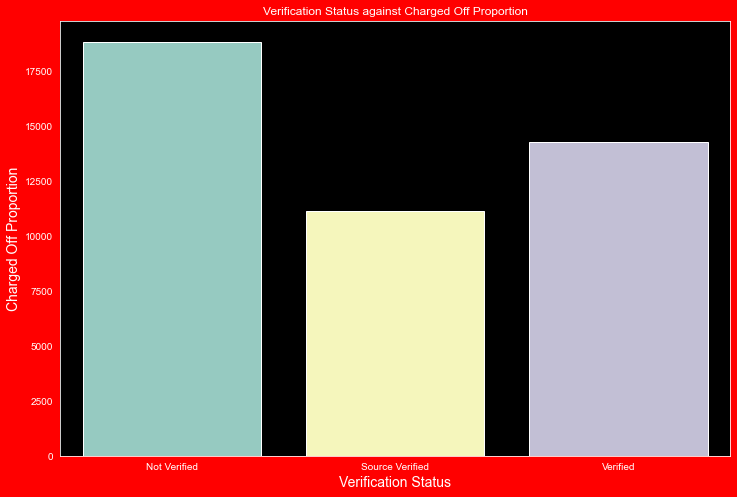

In [34]:
with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='r')
  ax1.set_title('Verification Status against Charged Off Proportion')
  ax1=sns.barplot(x='verification_status',y='ChargedOff_Proportion',data=verify_against_loan)
  ax1.set_xlabel('Verification Status',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

In [30]:
bankruptcies_against_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_against_loan['Total'] = bankruptcies_against_loan['Charged Off'] + bankruptcies_against_loan['Fully Paid']
bankruptcies_against_loan['ChargedOff_Proportion'] = bankruptcies_against_loan['Charged Off']/bankruptcies_against_loan['Total']
bankruptcies_against_loan.sort_values('ChargedOff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,2,2,3,5,0.400000
1,1,366,1271,1637,0.223580
0,0,5141,31097,36238,0.141868


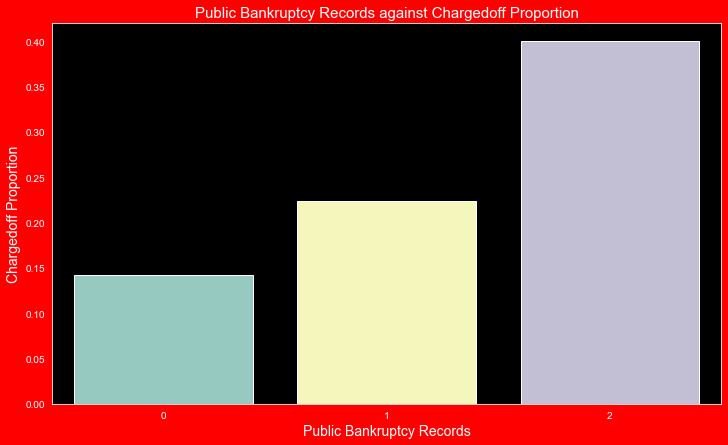

In [35]:
with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,7),facecolor='r')
  ax1.set_title('Public Bankruptcy Records against Chargedoff Proportion',fontsize=15,color='w')
  ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_against_loan)
  ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
  ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

In [38]:
bankruptcies_against_loan = loan_df.groupby(['pub_rec','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_against_loan['Total'] = bankruptcies_against_loan['Charged Off'] + bankruptcies_against_loan['Fully Paid'] 
bankruptcies_against_loan['Chargedoff_Proportion'] = bankruptcies_against_loan['Charged Off'] / bankruptcies_against_loan['Total']
bankruptcies_against_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,457.0,1556.0,2013.0,0.227024
2,2,10.0,38.0,48.0,0.208333
0,0,5160.0,31347.0,36507.0,0.141343
3,3,0.0,7.0,7.0,0.000000
4,4,0.0,2.0,2.0,0.000000


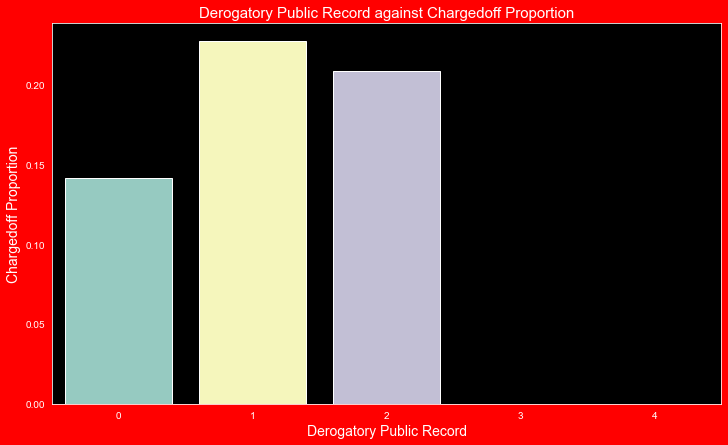

In [39]:
with plt.style.context('dark_background'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='r')
  ax1.set_title('Derogatory Public Record against Chargedoff Proportion',fontsize=15,color='w')
  ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_against_loan)
  ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
  ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
  plt.show()